# BAN 612 - Project part-2 - Analysis of the housing market in San Ramon

# submitted by - Alarmelu Pichu Mani, NetId - TJ6723

The purpose of this notebook is to explore the San Ramon housing data we scraped as part of the project and provide insights on the factors that drive the housing prices in San Ramon

#Predict the housing price using the identified features of the dataset and compare the developed model to illow's Zestimate feature



In [1]:
#imports
import pandas as pd   #pandas
import numpy as np  #numpy
import matplotlib.pylab as plt  #pyplot
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style("ticks")

# Data import and cleaning

Read the scraped data stored in SanRamon_housing.csv into a dataframe for analysis

In [2]:
df_in = pd.read_csv('SanRamon_housing.csv')

In [3]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        157 non-null    int64  
 1   Address           157 non-null    object 
 2   Year built        157 non-null    int64  
 3   Zestimate         157 non-null    object 
 4   Baths             157 non-null    object 
 5   Sqft              157 non-null    object 
 6   School_rating     157 non-null    int64  
 7   Status            157 non-null    object 
 8   Beds              156 non-null    float64
 9   Heating           143 non-null    object 
 10  Cooling           144 non-null    object 
 11  HomeType          157 non-null    object 
 12  Region            157 non-null    object 
 13  Hoa               157 non-null    object 
 14  TaxAssessedValue  152 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 18.5+ KB


In [4]:
df_in.head()

,Unnamed: 0,Address,Year built,Zestimate,Baths,Sqft,School_rating,Status,Beds,Heating,Cooling,HomeType,Region,Hoa,TaxAssessedValue
0,0,"510 Teresa Pl, San Ramon, CA 94583",1978,"$1,740,603",3,"2,750 sqft",8,"Sold: $1,720,000",5.0,"Zoned, Natural Gas",Zoned,SingleFamily,San Ramon,Has HOA fee: No,"$690,020"
1,1,"796 Lakemont Pl UNIT 6, San Ramon, CA 94582",1990,"$962,333",3,"1,727 sqft",9,"Sold: $950,000",2.0,Forced Air,Central Air,Townhouse,San Ramon,HOA fee: $582 monthly,"$805,000"
2,2,"321 Kingsley Pl, San Ramon, CA 94583",1971,"$1,194,027",2,"1,479 sqft",9,"Sold: $1,170,000",4.0,Forced air,NaN,SingleFamily,San Ramon,HOA fee: $582 monthly,"$227,298"
3,3,"339 Goldfield Pl, San Ramon, CA 94582",2016,"$1,409,758",3,"1,996 sqft",9,"Sold: $1,400,000",3.0,Zoned,Zoned,SingleFamily,San Ramon,HOA fee: $99 monthly,"$1,063,000"
4,4,"2053 Echo Pl, San Ramon, CA 94582",1989,"$1,177,549",3,"2,097 sqft",9,"Sold: $1,151,000",3.0,"Forced air, Gas",Other,Townhouse,San Ramon,Has HOA fee: Yes,"$923,104"


Looking for missing data using a heatmap.
The presence of a line shows that the data in those places are missing

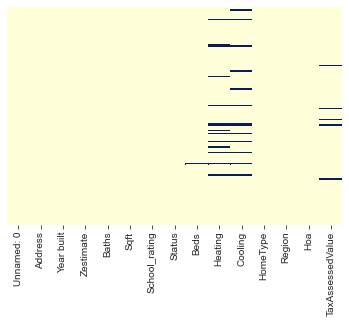

In [5]:
sns.heatmap(df_in.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Cleaning the dataset - column names and also the contents of the columns 

In [6]:
#Cleaning thr Year built column and converting it into an object data type.
#Since the built year needs to be considered as a categorical value(ordinal)
df_in = df_in.rename(columns ={'Year built': 'YearBuilt'}, inplace = False)
df_in['YearBuilt'] = df_in['YearBuilt'].astype(object)

In [7]:
#split the Status column into two - Status and price(sold price of the house)
df_in[['status', 'price']] = df_in['Status'].str.split(': ', 1, expand=True)

In [8]:
#needs some cleaning to remove outdated statuses
df_in['price'] = df_in['price'].replace('Coming soon: Mar 4.','$1,685,817', regex=True)
df_in['price'] = df_in['price'].replace('Mar 4.','$1,685,817', regex=True)
df_in['price'] = df_in['price'].replace('Coming soon: Mar 10.','$2,078,312', regex=True)
df_in['price'] = df_in['price'].replace('Mar 10.','$2,078,312', regex=True)
df_in['price'] = df_in['price'].replace('Coming soon: Mar 19.','$1,914,717', regex=True)
df_in['price'] = df_in['price'].replace('Mar 19.','$1,914,717', regex=True)
df_in['price'] = df_in['price'].str.strip('$')
df_in['price'] = df_in['price'].replace(',','', regex=True)
df_in['price'] = df_in['price'].astype(int)

In [9]:
#clean zestimate column - remove fill missing zestimate values with price 
df_in['Zestimate'] = df_in['Zestimate'].replace('Est. total selling costs (9%)',df_in['price'])
df_in['Zestimate'] = df_in['Zestimate'].replace('Est. total selling costs (8%)',df_in['price'])
df_in['Zestimate'] = df_in['Zestimate'].replace(',','', regex=True)
df_in['Zestimate'] = df_in['Zestimate'].str.strip('$')
df_in['Zestimate'] = df_in['Zestimate'].fillna(df_in['price'])
df_in['Zestimate'] = df_in['Zestimate'].astype(int)

In [10]:
#clean the Baths and Beds columns of some extra strings and fill missing values with 1
#as a house must have at least 1 bath and bedroom
df_in['Baths'] = df_in['Baths'].str.strip('--')
df_in['Baths'] = df_in['Baths'].replace('',0, regex=True)
df_in['Baths'] = df_in['Baths'].fillna(1)
df_in['Beds'] = df_in['Beds'].fillna(1)

#change the datatypes accordingly
df_in['Baths']=df_in['Baths'].astype(float)
df_in['Beds']=df_in['Beds'].astype(int)

In [11]:
#clean the Sqft column - remove some extra strings present
df_in['Sqft'] = df_in['Sqft'].str.replace('sqft' , '')
df_in['Sqft'] = df_in['Sqft'].replace(',','', regex=True)
df_in['Sqft'] = df_in['Sqft'].replace('ba','', regex=True)

#change the datatypes accordingly
df_in['Sqft'] = df_in['Sqft'].astype(int)

In [12]:
#clean school rating
df_in['School_rating']=df_in['School_rating'].astype(int)
df_in = df_in.rename(columns ={'School_rating': 'SchoolRating'}, inplace = False)

In [13]:
#clean Hoa column of unwanted strings
df_in['Hoa'] = df_in.Hoa.str.replace('Has HOA fee:' , '')
df_in['Hoa'] = df_in.Hoa.str.replace('HOA fee: ' , '')
df_in['Hoa'] = df_in.Hoa.str.replace('monthly' , '')
df_in = df_in.rename(columns ={'Hoa': 'MonthlyHoa'}, inplace = False)

In [14]:
#if no hoa then its $0
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('No',0, regex=True)

#if yes and values are missing, apply a placeholder of 1
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('Yes',1, regex=True)#placeholder of 1

#convert all values to monthly hoa figures
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('200 annually',17, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('117 quarterly',39, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('480 annually',40, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('310 annually',26, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('145 quarterly',48, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('117 quarterly',39, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('325 quarterly',108, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('305 annually',24, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('325 annually',27, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace('145 annually',12, regex=True)
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].str.strip('$')
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].fillna(0)

In [15]:
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].astype(int)

In [16]:
median_hoa = df_in['MonthlyHoa'].median()
#replace hoa values 1 with median_hoa
df_in['MonthlyHoa'] = df_in['MonthlyHoa'].replace(1,median_hoa)

In [17]:
#clean TaxAssessedValue column of unwanted strings
df_in['TaxAssessedValue'] = df_in['TaxAssessedValue'].replace(',','', regex=True)
df_in['TaxAssessedValue'] = df_in['TaxAssessedValue'].str.replace(r'\D', '')
df_in['TaxAssessedValue'] = df_in['TaxAssessedValue'].fillna(df_in['price']*0.90)
df_in['TaxAssessedValue'] = df_in['TaxAssessedValue'].astype(int)

In [18]:
#drop unwanted columns
df_in = df_in.drop(columns='Status')
df_in = df_in.drop(columns='Unnamed: 0')

In [19]:
#replace missing and incorrect values with acceptable values
df_in['Heating'] = df_in['Heating'].fillna('Other')
df_in['Cooling'] = df_in['Cooling'].fillna('Other')
df_in['status'] = df_in['status'].replace('Coming soon','Sold', regex=True)

In [20]:
#clean Heating column of repetitions and unwanted strings
df_in['Heating'] = df_in['Heating'].str.replace(r"\(.*?\)", "")
df_in['Heating'] = df_in['Heating'].str.replace(r" ", "")
df_in['Heating'] = df_in['Heating'].str.replace(r",Other,SmartVent", "")
df_in['Heating'] = df_in['Heating'].str.replace(r",IndividualRmControls,Other", "")
df_in['Heating'] = df_in['Heating'].str.replace(r"FireplaceInsert", "Fireplace")
df_in['Heating'] = df_in['Heating'].str.replace(r"NaturalGas", "Gas")
df_in['Heating'] = df_in['Heating'].str.replace(r"Fireplace,ForcedAir","ForcedAir,Fireplace")
df_in['Heating'] = df_in['Heating'].str.replace(r"ForcedAir","Forcedair")

In [21]:
#clean Cooling column of repetitions and unwanted strings
df_in['Cooling'] = df_in['Cooling'].str.replace(r"\(.*?\)", "")
df_in['Cooling'] = df_in['Cooling'].str.replace(r" ", "")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Whole House Fan, ENERGY STAR Qualified Equipment","Other")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Refrigerator, Central, Solar","Central, Solar")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Wall/Window Unit","Wall")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Ceiling Fan","Fan")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Whole House Fan","Fan")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"ENERGY STAR Qualified Equipment","Other")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Central Air","Central")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Fan, Zoned, Fan","Fan, Zoned")
df_in['Cooling'] = df_in['Cooling'].str.replace(r"Fan, Central, Fan","Fan, Central")

In [22]:
df_in['HomeType'] = df_in['HomeType'].str.replace(r" ", "")

In [23]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           157 non-null    object 
 1   YearBuilt         157 non-null    object 
 2   Zestimate         157 non-null    int64  
 3   Baths             157 non-null    float64
 4   Sqft              157 non-null    int64  
 5   SchoolRating      157 non-null    int64  
 6   Beds              157 non-null    int64  
 7   Heating           157 non-null    object 
 8   Cooling           157 non-null    object 
 9   HomeType          157 non-null    object 
 10  Region            157 non-null    object 
 11  MonthlyHoa        157 non-null    int64  
 12  TaxAssessedValue  157 non-null    int64  
 13  status            157 non-null    object 
 14  price             157 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 18.5+ KB


In [24]:
df_in.head(5)

,Address,YearBuilt,Zestimate,Baths,Sqft,SchoolRating,Beds,Heating,Cooling,HomeType,Region,MonthlyHoa,TaxAssessedValue,status,price
0,"510 Teresa Pl, San Ramon, CA 94583",1978,1740603,3.0,2750,8,5,"Zoned,Gas",Zoned,SingleFamily,San Ramon,0,690020,Sold,1720000
1,"796 Lakemont Pl UNIT 6, San Ramon, CA 94582",1990,962333,3.0,1727,9,2,Forcedair,CentralAir,Townhouse,San Ramon,582,805000,Sold,950000
2,"321 Kingsley Pl, San Ramon, CA 94583",1971,1194027,2.0,1479,9,4,Forcedair,Other,SingleFamily,San Ramon,582,227298,Sold,1170000
3,"339 Goldfield Pl, San Ramon, CA 94582",2016,1409758,3.0,1996,9,3,Zoned,Zoned,SingleFamily,San Ramon,99,1063000,Sold,1400000
4,"2053 Echo Pl, San Ramon, CA 94582",1989,1177549,3.0,2097,9,3,"Forcedair,Gas",Other,Townhouse,San Ramon,0,923104,Sold,1151000


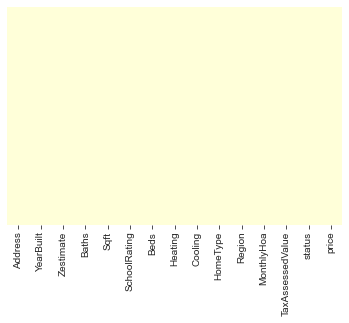

In [25]:
sns.heatmap(df_in.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [26]:
df_in.to_csv('clean_data.csv')

# Exploratory analysis:
How each feature affects the price?

Analyzing the effect of the home's age on the price

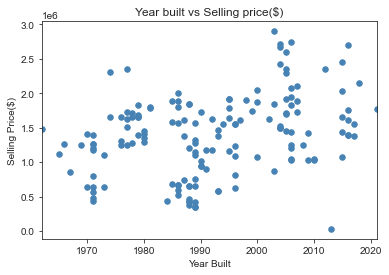

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df_in['YearBuilt'], df_in['price'],s=30, c='steelblue', alpha=1) 
plt.xlabel('Year Built')
plt.xlim(df_in['YearBuilt'].min(),df_in['YearBuilt'].max())
plt.ylabel('Selling Price($)')
plt.title('Year built vs Selling price($)')
plt.show()

Analyzing how the age affects the price for different home types

Text(0.5, 1.0, 'Scatter plot of Year built vs Price for different home types')

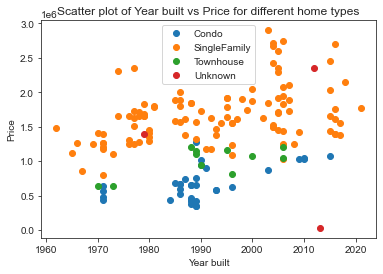

In [28]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['YearBuilt'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Year built')
plt.ylabel("Price")
plt.title('Scatter plot of Year built vs Price for different home types')

The effect of the size of the home on the price

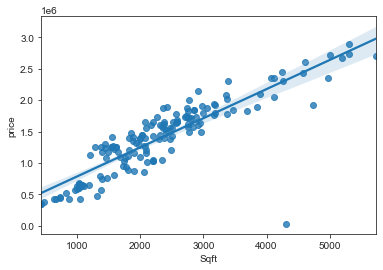

In [29]:
sns.regplot("Sqft","price",df_in)

The effect of the size of the home on the price for different home types

Text(0.5, 1.0, 'Scatter plot of Sq.Ft vs Price for different home types')

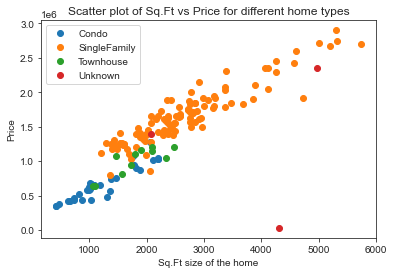

In [30]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['Sqft'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Sq.Ft size of the home')
plt.ylabel("Price")
plt.title('Scatter plot of Sq.Ft vs Price for different home types')

Analyzing the impact of the number of Bedrooms  and Bathrooms on the price

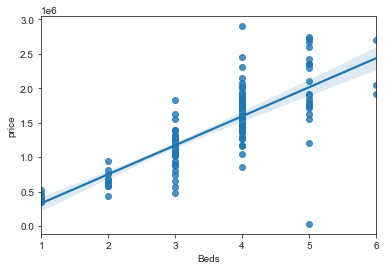

In [31]:
sns.regplot("Beds","price",df_in)

Text(0.5, 1.0, 'Scatter plot of No.of beds vs Price for different home types')

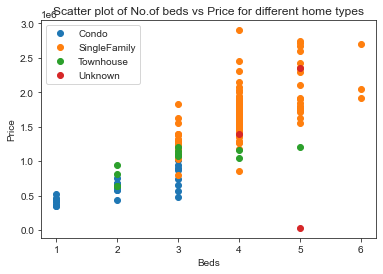

In [32]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['Beds'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Beds')
plt.ylabel("Price")
plt.title('Scatter plot of No.of beds vs Price for different home types')

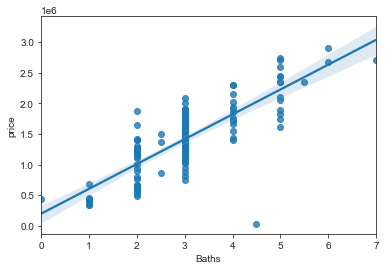

In [33]:
sns.regplot("Baths","price",df_in)

Text(0.5, 1.0, 'Scatter plot of No.of baths vs Price for different home types')

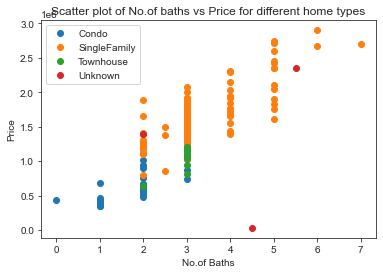

In [34]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['Baths'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('No.of Baths')
plt.ylabel("Price")
plt.title('Scatter plot of No.of baths vs Price for different home types')

Impact of school ratings on the housing prices

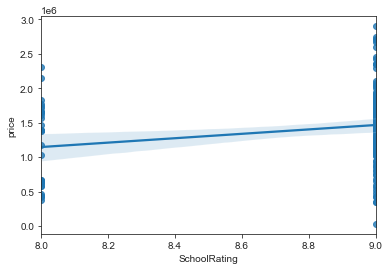

In [35]:
sns.regplot("SchoolRating","price",df_in)

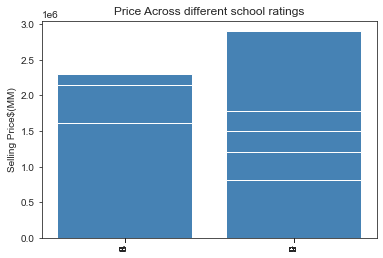

In [36]:
plt.bar(df_in['SchoolRating'].astype(str), df_in['price'], align='center',color='steelblue')
plt.ylabel('Selling Price$(MM)')
labels = df_in['SchoolRating'].astype(str)
plt.xticks(labels, rotation='vertical')
plt.title('Price Across different school ratings')
plt.show()

How monthly Hoa component of the outflow impacts the pricing?

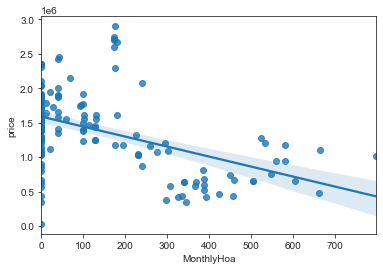

In [37]:
sns.regplot("MonthlyHoa","price",df_in)

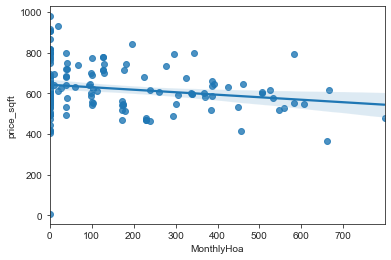

In [38]:
df_in['price_sqft'] = df_in['price']/df_in['Sqft']
sns.regplot("MonthlyHoa","price_sqft",df_in)

Text(0.5, 1.0, 'Scatter plot of HOA vs Price for different home types')

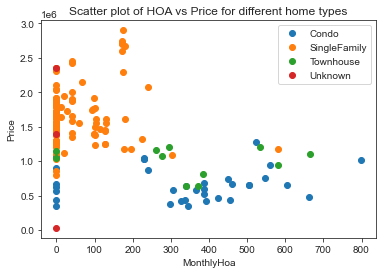

In [39]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['MonthlyHoa'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('MonthlyHoa')
plt.ylabel("Price")
plt.title('Scatter plot of HOA vs Price for different home types')

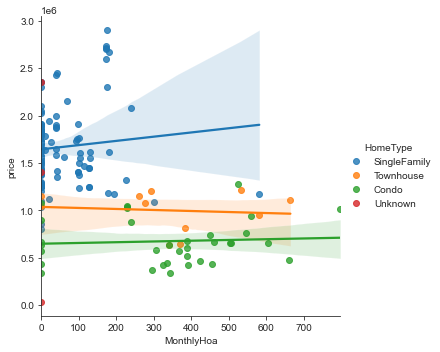

In [40]:
sns.lmplot("MonthlyHoa", "price", hue = 'HomeType', data = df_in);

How tax assesment impacts the pricing?

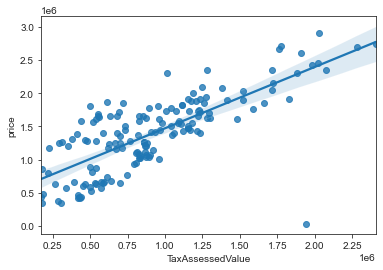

In [41]:
sns.regplot("TaxAssessedValue", "price",df_in)

Text(0.5, 1.0, 'Scatter plot of Tax assessment vs Price for different home types')

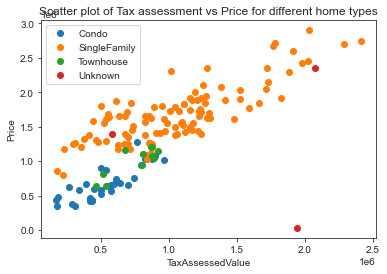

In [42]:
groups=df_in.groupby("HomeType")
for name, group in groups:
    plt.plot(group['TaxAssessedValue'],group['price'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('TaxAssessedValue')
plt.ylabel("Price")
plt.title('Scatter plot of Tax assessment vs Price for different home types')

Median prices for differnt kinds of homes

In [43]:
single_family = df_in['HomeType']=='SingleFamily'
df_sf = df_in[single_family]
sf_medianprice = df_sf['price'].median()
print(sf_medianprice)

1625000.0


In [44]:
condo = df_in['HomeType']=='Condo'
df_condo = df_in[condo]
condo_medianprice = df_condo['price'].median()
print(condo_medianprice)

642500.0


In [45]:
townhouse = df_in['HomeType']=='Townhouse'
df_th = df_in[townhouse]
th_medianprice = df_th['price'].median()
print(th_medianprice)

1075000.0


Price distribution in the San Ramon Area

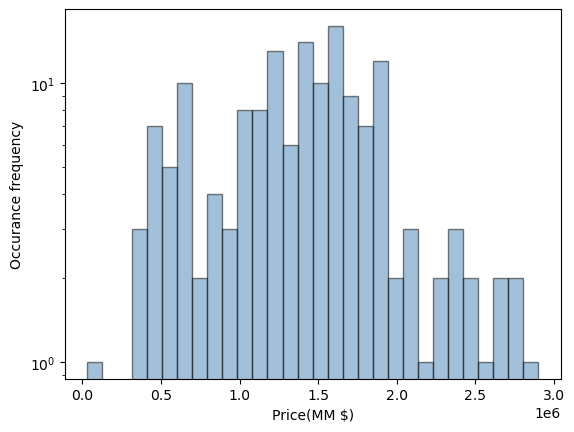

In [46]:
price = df_in['price']
#histogram for Retail price
plt.style.use('default')
plt.hist(price, density=False,edgecolor='black', bins=30,alpha = 0.5,log = True,color = 'steelblue')
plt.ylabel('Occurance frequency')
plt.xlabel('Price(MM $)');

Price variations for different types of homes

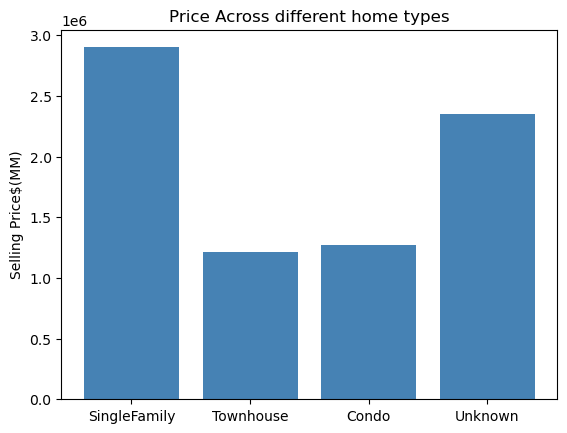

In [47]:
plt.bar(df_in['HomeType'].astype(str), df_in['price'], align='center',color='steelblue')
plt.ylabel('Selling Price$(MM)')
plt.title('Price Across different home types')
plt.show()

How heating and cooling systems impact prices?

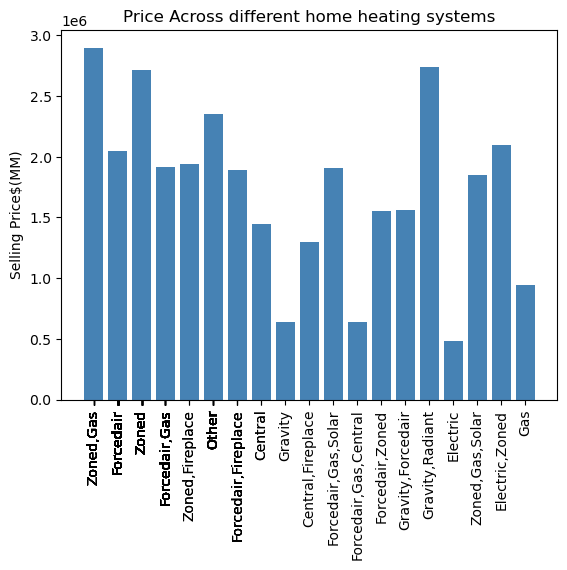

In [48]:
plt.bar(df_in['Heating'].astype(str), df_in['price'], align='center',color='steelblue')
plt.ylabel('Selling Price$(MM)')
labels = df_in['Heating'].astype(str)
plt.xticks(labels, rotation='vertical')
plt.title('Price Across different home heating systems')
plt.show()

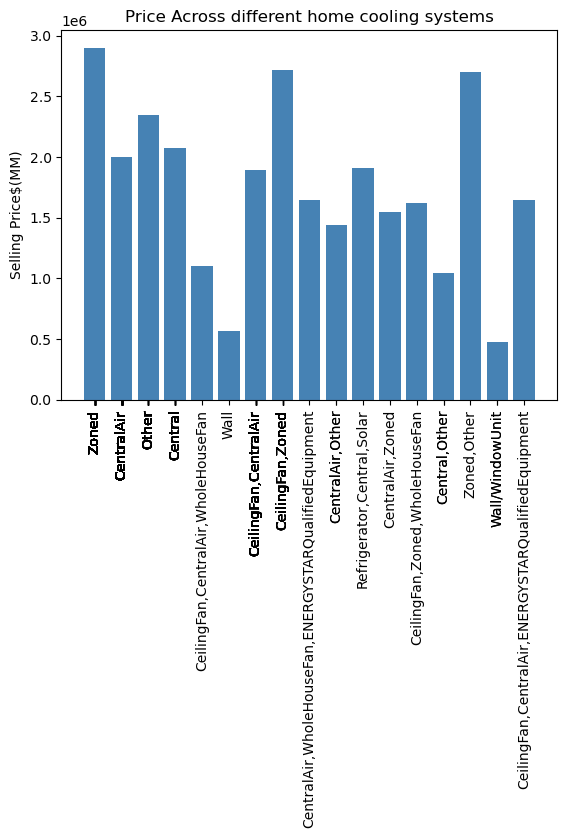

In [49]:
plt.bar(df_in['Cooling'].astype(str), df_in['price'], align='center',color='steelblue')
plt.ylabel('Selling Price$(MM)')
labels = df_in['Cooling'].astype(str)
plt.xticks(labels, rotation='vertical')
plt.title('Price Across different home cooling systems')
plt.show()

# Research questions:
    1.Understanding the combinations of features that drives the pricing 
    2. Predicting the housing price using multivariate regression and comparing the developed model to 'Zestimate'

Drawing a heatmap of correlation between the features to get a better understanding of the data

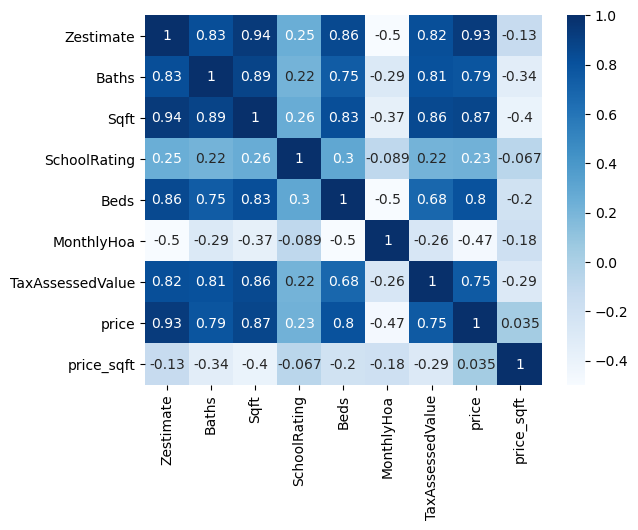

In [50]:
sns.heatmap(df_in.corr(),annot=True,cmap='Blues')

# Simple Linear Regression 

Using Simple linear regression, I am trying to understand the R-squared values for each feature with the pricing. The higher the R-squared values, the stronger the relationship.

In this, Zestimate and Tax assessed value features are avoided for the following reasons:
1.Zestimate is simply someone else's prediction of the selling price of the house. We need to compare our price predictions using the home features to Zestimate to see how our model fares.
2.Tax assessed value is a derivation from the value of the home. Hence it will have a high colinearity and can bias the model.

In [51]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

#Get the Adjusted R-square values for price vs each feature
# formula: response ~ predictor + predictor
res1 = smf.ols('price ~ YearBuilt', data=df_in).fit()
res2 = smf.ols('price ~ Sqft', data=df_in).fit()
res3 = smf.ols('price ~ Baths', data=df_in).fit()
res4 = smf.ols('price ~ Beds', data=df_in).fit()
res5 = smf.ols('price ~ SchoolRating', data=df_in).fit()
res6 = smf.ols('price ~ Heating', data=df_in).fit()
res7 = smf.ols('price ~ Cooling', data=df_in).fit()
res8 = smf.ols('price ~ HomeType', data=df_in).fit()
res9 = smf.ols('price ~ MonthlyHoa', data=df_in).fit()

In [52]:
#constructing a dictionary to hold the rsquared_adj values
adj_rsq = {'YearBuilt':res1.rsquared,
           'Sqft':res2.rsquared,
           'Baths':res3.rsquared,
           'Beds':res4.rsquared,
           'SchoolRating':res5.rsquared,
           'Heating':res6.rsquared,
           'Cooling':res7.rsquared,
           'HomeType':res8.rsquared,
           'MonthlyHoa':res9.rsquared
          }

       Features  r_square
1          Sqft  0.761317
3          Beds  0.643086
2         Baths  0.617636
7      HomeType  0.538848
0     YearBuilt  0.514240
6       Cooling  0.435714
5       Heating  0.430164
8    MonthlyHoa  0.218329
4  SchoolRating  0.053382 



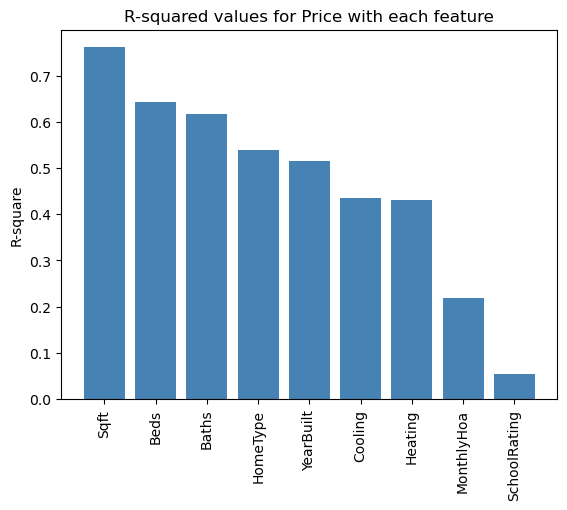

In [53]:
#making a datadrame with features and corresponding r-squared values
df_adj_rsq= pd.DataFrame(list(adj_rsq.items()),columns = ['Features','r_square']) 
df_adj_rsq.set_index('Features')
df_adj_rsq = df_adj_rsq.sort_values('r_square',ascending = False)
print(df_adj_rsq,'\n')

plt.bar(df_adj_rsq['Features'].astype(str), df_adj_rsq['r_square'], align='center',color='steelblue')
plt.ylabel('R-square')
labels = df_adj_rsq['Features'].astype(str)
plt.xticks(labels, rotation='vertical')
plt.title('R-squared values for Price with each feature')
plt.show()

From the above barchart, we can understand that Sqft is the biggest influencer of the home price, followed by the number of beds and baths

MonthlyHoa and School ratings are the least influencers

#  Multivariate Regression to predict the housing prices and model accuracy

In [66]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
# formula: response ~ predictor + predictor
results_1 = smf.ols('price ~ Sqft + Beds + Baths + HomeType', data=df_in).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.24e-65
Time:                        10:25:07   Log-Likelihood:                -2139.1
No. Observations:                 157   AIC:                             4292.
Df Residuals:                     150   BIC:                             4314.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [67]:
results_2 = smf.ols('price ~ Sqft + Beds + Baths + HomeType + YearBuilt + Cooling', data=df_in).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     42.52
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.66e-46
Time:                        10:25:11   Log-Likelihood:                -2025.2
No. Observations:                 157   AIC:                             4190.
Df Residuals:                      87   BIC:                             4404.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [68]:
results_3 = smf.ols('price ~ Sqft + Beds + Baths + HomeType + YearBuilt + Cooling + Heating', data=df_in).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     30.56
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.91e-35
Time:                        10:25:16   Log-Likelihood:                -2020.9
No. Observations:                 157   AIC:                             4212.
Df Residuals:                      72   BIC:                             4472.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

considering the Regression model based on the combinations of results_2 as it has the best adjusted R-squared value

In [59]:
price_predictions = results_2.predict(df_in[['Sqft','Beds', 'Baths', 'HomeType','YearBuilt','Cooling']])

In [60]:
print(price_predictions)

0      1.700302e+06
1      9.373171e+05
2      1.161181e+06
3      1.311731e+06
4      1.106471e+06
           ...     
152    9.995017e+05
153    1.711417e+06
154    1.255887e+06
155    7.553436e+05
156    8.162768e+05
Length: 157, dtype: float64


In [61]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
print(mean_absolute_percentage_error(df_in['price'], price_predictions))

5.41509976073848


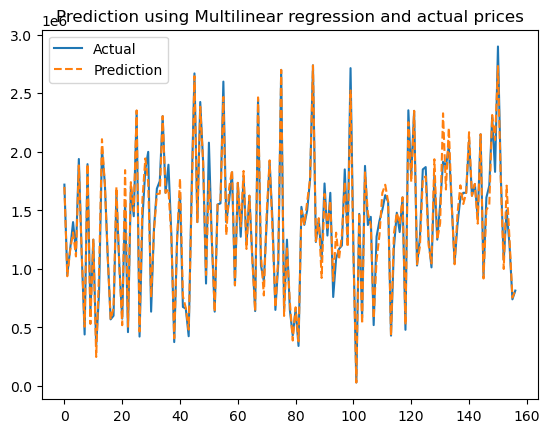

In [63]:
from matplotlib import pyplot as plt
plt.plot(df_in['price'])
plt.plot(price_predictions,linestyle='--')
plt.legend(["Actual", "Prediction"])
plt.title('Prediction using Multilinear regression and actual prices')
plt.show()

See how Zestimate fares against the actual sold price

In [64]:
print(mean_absolute_percentage_error(df_in['price'], df_in['Zestimate']))

56.00481768746697


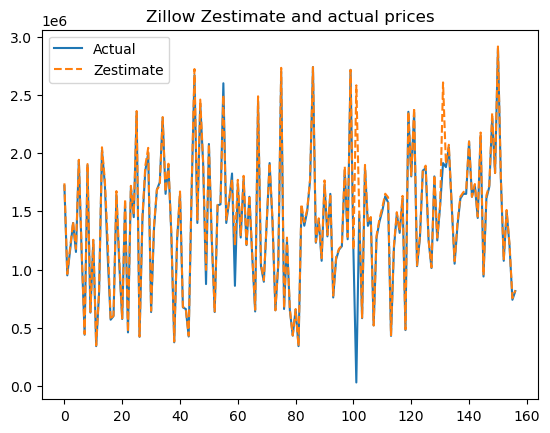

In [65]:
from matplotlib import pyplot as plt
plt.plot(df_in['price'])
plt.plot(df_in['Zestimate'],linestyle='--')
plt.legend(["Actual", "Zestimate"])
plt.title('Zillow Zestimate and actual prices')
plt.show()